In [ ]:
from tensorflow.keras import datasets, layers, Model
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
train_images_normalized = (train_images / 255.0).astype('float32')
test_images_normalized = (test_images / 255.0).astype('float32')

X_train = train_images_normalized[:50000]
y_train = train_labels[:50000]
X_val = train_images_normalized[50000:]
y_val = train_labels[50000:]

train_images_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1)
val_images_cnn = X_val.reshape(X_val.shape[0], 28, 28, 1)
test_images_cnn = test_images_normalized.reshape(test_images_normalized.shape[0], 28, 28, 1)

In [ ]:
inp = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(16, 3, padding='same', activation="elu")(inp)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(16, 3, padding='same', activation="elu")(x)
x = layers.Conv2D(8, 3, padding='same', activation="elu")(x)
x = layers.MaxPooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation="elu")(x)
out = layers.Dense(10, activation="softmax")(x)

model_cnn = Model(inputs=inp, outputs=out)
model_cnn.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 14, 14, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 392)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          25,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,442 (115.01 KB)

 Trainable params: 29,442 (115.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

## Callbacks

In [ ]:
from tensorflow.keras import callbacks

early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=4)
model_checkpoint = callbacks.ModelCheckpoint('best_model.keras',
                                             monitor='val_loss',
                                             save_best_only=True)
logger = callbacks.CSVLogger('training.csv')
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
tensorboard = callbacks.TensorBoard(log_dir='logs')

callbacks_list = [early_stopping, model_checkpoint, logger, reduce_lr, tensorboard]

In [ ]:
history_cnn = model_cnn.fit(train_images_cnn, y_train,
                            batch_size=128,
                            epochs=50,
                            callbacks=callbacks_list,
                            validation_data=(val_images_cnn, y_val))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7170 - loss: 0.8293 - val_accuracy: 0.8463 - val_loss: 0.4256 - learning_rate: 0.0010
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8544 - loss: 0.4030 - val_accuracy: 0.8682 - val_loss: 0.3603 - learning_rate: 0.0010
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8774 - loss: 0.3362 - val_accuracy: 0.8793 - val_loss: 0.3350 - learning_rate: 0.0010
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8857 - loss: 0.3158 - val_accuracy: 0.8810 - val_loss: 0.3292 - learning_rate: 0.0010
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8940 - loss: 0.2879 - val_accuracy: 0.8882 - val_loss: 0.3076 - learning_rate: 0.0010
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9032 - loss: 0.2675 - val_accuracy: 0.8947 - val_loss: 0.2873 - learning_rate: 0.0010
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9066 - loss: 0.2548 -

<Axes: >

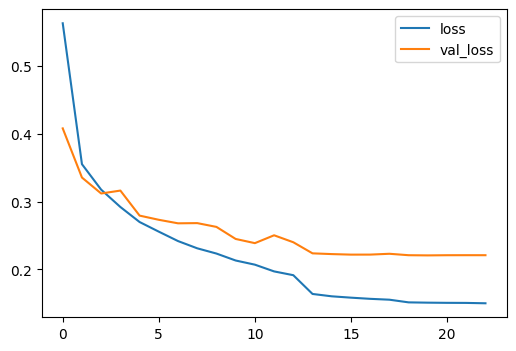

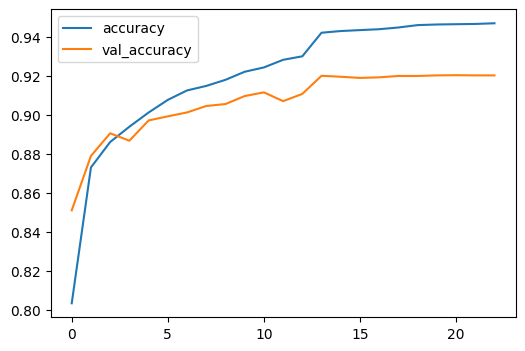

In [ ]:
import pandas as pd
history_pd_cnn = pd.DataFrame(history_cnn.history)
history_pd_cnn[['loss', 'val_loss']].plot(figsize=(6, 4))
history_pd_cnn[['accuracy', 'val_accuracy']].plot(figsize=(6, 4))

In [ ]:
loss, acc = model_cnn.evaluate(test_images_cnn, test_labels)
print('Test accuracy:', acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9133 - loss: 0.2472
Test accuracy: 0.9140999913215637
